In [1]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('../input/software-defect-prediction/jm1.csv')

df['uniq_Op'] = pd.to_numeric(df['uniq_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['uniq_Opnd'] = pd.to_numeric(df['uniq_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['branchCount'] = pd.to_numeric(df['branchCount'], errors='coerce') ## convert to number, make NaNs from ?s 
df['defects'] = df['defects'].astype(int)

df = df.dropna()
df = df.reset_index(drop=True)


In [3]:
from sklearn import model_selection

# Split-out validation dataset
array = df.values
X = array[:,0:21]
Y = array[:,21]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)


In [4]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_validation=sc.fit_transform(X_validation)

In [5]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
%time classifier.fit(X_train,Y_train)

#predicting
y_pred=classifier.predict(X_validation)


CPU times: user 3.12 s, sys: 149 ms, total: 3.27 s
Wall time: 3.28 s


In [6]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#print("1. Accuracy: {}".format(accuracy_score(Y_validation, y_pred)))
#print("2. Confusion Matrix:n{}".format(pd.crosstab(Y_validation, y_pred, rownames=['True'], colnames=['Predicted'])))
#f1_score(Y_validation, y_pred, average='weighted')
print('Accuracy Score : ' + str(accuracy_score(Y_validation,y_pred)))
print('Precision Score : ' + str(precision_score(Y_validation,y_pred)))
print('Recall Score : ' + str(recall_score(Y_validation,y_pred)))
print('F1 Score : ' + str(f1_score(Y_validation,y_pred)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(Y_validation,y_pred)))


Accuracy Score : 0.8299632352941176
Precision Score : 0.5789473684210527
Recall Score : 0.14285714285714285
F1 Score : 0.22916666666666666
Confusion Matrix : 
[[1751   40]
 [ 330   55]]




```
`# This is formatted as code`
```

Grid Search Implementation:

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier=SVC(kernel='rbf',random_state=0)
parameters={'C':[1e-2,1e-1,1,1e1,0.009,0.01,0.09,5,10,25,100],'kernel':['rbf'],'gamma':[0.1,0.01,1e-5,1e-4,1e-3]}
grid = GridSearchCV(classifier,parameters,n_jobs=-1,cv=3,scoring='accuracy')
%time grid = grid.fit(X_train,Y_train)
best_acc = grid.best_score_
best_param = grid.best_params_

CPU times: user 5.43 s, sys: 193 ms, total: 5.62 s
Wall time: 1min 54s


In [11]:
print(best_acc)
print(best_param)
pd.DataFrame(grid.cv_results_)

0.8136487073660524
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10.0}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.880832,0.063278,0.504179,0.002175,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
1,1.455659,0.071585,0.485027,0.001288,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
2,1.170772,0.008718,0.477497,0.003597,0.01,1e-05,rbf,"{'C': 0.01, 'gamma': 1e-05, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
3,1.252572,0.007859,0.481982,0.001012,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
4,1.269325,0.012860,0.479834,0.002176,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
5,1.694425,0.028316,0.521395,0.006801,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.802550,0.802827,0.802827,0.802734,0.000130,34
6,1.546660,0.022103,0.494368,0.004760,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.802550,0.803171,0.804550,0.803424,0.000836,28
7,1.282806,0.021117,0.487157,0.014010,0.1,1e-05,rbf,"{'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
8,1.442234,0.034461,0.479821,0.002543,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.802550,0.802827,0.802482,0.802619,0.000149,35
9,1.485062,0.015516,0.488012,0.005525,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.802895,0.803516,0.803516,0.803309,0.000293,31


In [13]:
svc_after_gs=SVC(kernel='rbf',random_state=0,C=10.0 ,gamma = 0.1)
svc_after_gs.fit(X_train,Y_train)
y_pred_after_gs=svc_after_gs.predict(X_validation)


from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report
print('Accuracy Score : ' + str(accuracy_score(Y_validation,y_pred_after_gs)))
print('Precision Score : ' + str(precision_score(Y_validation,y_pred_after_gs)))
print('Recall Score : ' + str(recall_score(Y_validation,y_pred_after_gs)))
print('F1 Score : ' + str(f1_score(Y_validation,y_pred_after_gs)))

print(classification_report(Y_validation, y_pred_after_gs))
print('Confusion Matrix : \n' + str(confusion_matrix(Y_validation,y_pred_after_gs)))

Accuracy Score : 0.8253676470588235
Precision Score : 0.5165562913907285
Recall Score : 0.2025974025974026
F1 Score : 0.29104477611940294
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1791
         1.0       0.52      0.20      0.29       385

    accuracy                           0.83      2176
   macro avg       0.68      0.58      0.60      2176
weighted avg       0.79      0.83      0.79      2176

Confusion Matrix : 
[[1718   73]
 [ 307   78]]


ROC AUC=0.581


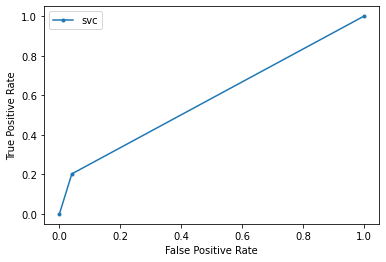

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_validation, y_pred_after_gs)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(Y_validation, y_pred_after_gs)
# plot the roc curve for the model
plt.plot(fpr, tpr,  marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

random search implemenatation:

In [9]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
parameters={'C':[1e-2,1e-1,1,1e1,0.009,0.01,0.09,5,10,25],'kernel':['rbf'],'gamma':[0.1,0.01,1e-5,1e-4,1e-3]}
random =RandomizedSearchCV(classifier,parameters,n_iter=10,cv=3,scoring='accuracy',n_jobs=-1)
%time random=random.fit(X_train,Y_train)
best_acc=random.best_score_
best_param=random.best_params_

CPU times: user 6.56 s, sys: 94 ms, total: 6.66 s
Wall time: 22.8 s


In [12]:
print(best_acc)
print(best_param)
pd.DataFrame(random.cv_results_)

0.8136487073660524
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10.0}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.484438,0.028499,0.495577,0.003460,rbf,0.01,0.09,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.09}",0.802550,0.803516,0.804550,0.803539,0.000817,3
1,1.183191,0.011895,0.485395,0.002990,rbf,0.0001,0.01,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.01}",0.802550,0.802827,0.802482,0.802619,0.000149,4
2,2.284547,0.129174,0.490842,0.005508,rbf,0.01,10,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}",0.813232,0.806963,0.805929,0.808708,0.003227,2
3,1.395471,0.039895,0.472459,0.005014,rbf,1e-05,1,"{'kernel': 'rbf', 'gamma': 1e-05, 'C': 1}",0.802550,0.802827,0.802482,0.802619,0.000149,4
4,1.293367,0.012076,0.503979,0.003062,rbf,0.1,0.01,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.01}",0.802550,0.802827,0.802482,0.802619,0.000149,4
5,1.349483,0.073392,0.497324,0.016606,rbf,0.01,0.009,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.009}",0.802550,0.802827,0.802482,0.802619,0.000149,4
6,1.155343,0.010531,0.468618,0.002308,rbf,1e-05,0.01,"{'kernel': 'rbf', 'gamma': 1e-05, 'C': 0.01}",0.802550,0.802827,0.802482,0.802619,0.000149,4
7,4.045022,0.279451,0.511477,0.006582,rbf,0.1,10,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 10.0}",0.815300,0.812134,0.813513,0.813649,0.001296,1
8,1.106412,0.008343,0.477244,0.008674,rbf,1e-05,0.01,"{'kernel': 'rbf', 'gamma': 1e-05, 'C': 0.01}",0.802550,0.802827,0.802482,0.802619,0.000149,4
9,1.201396,0.012554,0.353198,0.021841,rbf,0.001,0.01,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.01}",0.802550,0.802827,0.802482,0.802619,0.000149,4


In [15]:
svc_after_rs=SVC(kernel='rbf',random_state=0,C=10.0 ,gamma = 0.1)
svc_after_rs.fit(X_train,Y_train)
y_pred_after_rs=svc_after_rs.predict(X_validation)


from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report
print('Accuracy Score : ' + str(accuracy_score(Y_validation,y_pred_after_rs)))
print('Precision Score : ' + str(precision_score(Y_validation,y_pred_after_rs)))
print('Recall Score : ' + str(recall_score(Y_validation,y_pred_after_rs)))
print('F1 Score : ' + str(f1_score(Y_validation,y_pred_after_rs)))

print(classification_report(Y_validation, y_pred_after_rs))
print('Confusion Matrix : \n' + str(confusion_matrix(Y_validation,y_pred_after_rs)))

Accuracy Score : 0.8253676470588235
Precision Score : 0.5165562913907285
Recall Score : 0.2025974025974026
F1 Score : 0.29104477611940294
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1791
         1.0       0.52      0.20      0.29       385

    accuracy                           0.83      2176
   macro avg       0.68      0.58      0.60      2176
weighted avg       0.79      0.83      0.79      2176

Confusion Matrix : 
[[1718   73]
 [ 307   78]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_validation, y_pred_after_rs)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(Y_validation, y_pred_after_rs)
# plot the roc curve for the model
plt.plot(fpr, tpr,  marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()